<h2><center><font color="black"><strong>Test d'algorithme de KNN sur les coordonnées géographiques</strong></font></center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
    # Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    # Pipeline & Preprocess
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

    # Scores
from sklearn.metrics import balanced_accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.metrics import mean_absolute_percentage_error

#### Import de la base

In [6]:
df_Paris = pd.read_csv('../Data/update_data/df_Paris_Processed_Louise.csv', low_memory = False, encoding = 'latin1')
df_Paris_bis = pd.read_csv('../Data/update_data/df_Paris_Processed_Antonin.csv', low_memory = False, encoding = 'latin1')

df_Marseille = pd.read_csv('../Data/update_data/df_Marseille_Processed_1.csv', low_memory = False, encoding = 'latin1')
df_Lyon = pd.read_csv('../Data/update_data/df_Lyon_Processed.csv', low_memory = False, encoding = 'latin1')
df_Toulouse = pd.read_csv('../Data/update_data/df_Toulouse_Processed.csv', low_memory = False, encoding = 'latin1')

In [7]:
df = pd.concat([df_Paris, df_Marseille, df_Lyon, df_Toulouse] , axis=0 , ignore_index=True)

In [7]:
df_Paris_bis.head(3)

,Unnamed: 0,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_house,Nombre_dependance,geometry,iris_code,iris_name,Prix_m2,Year,Month,prix_m2_moy_surf_habit,prix_m2_moy_terrain,Vente_par_iris,num_trimestre,quarter,IPL,IPL_{Q-1},N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,Arrondissement,n_metros_iris,dist_metro,trimestre,prix_m2_moy_IRIS_trimestri_surf_habit,taux_accroissement
0,0,2017-731653,2017-07-04,2.0,75103,0.0,42.0,3.0,0,571110.0,48.858043,2.366404,2,1,75,1,0,POINT (2.366404 48.858043),751031102,Les Archives,13597.857143,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,[0.0016037123683117535],2017-07-01,11964.49675,0.0
1,1,2017-731668,2017-07-07,2.0,75103,0.0,88.0,3.0,0,1414600.0,48.857626,2.364992,2,1,75,1,1,POINT (2.364992 48.857626),751031102,Les Archives,16075.000000,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,[0.002943177844486507],2017-07-01,11964.49675,0.0
2,2,2017-731783,2017-07-19,2.0,75103,0.0,17.0,1.0,0,215000.0,48.856136,2.366991,1,1,75,1,0,POINT (2.366991 48.856136),751031102,Les Archives,12647.058824,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,[0.0017116064606917485],2017-07-01,11964.49675,0.0


In [8]:
%run '../Helpers/preprocessing.py'

In [9]:
%run '../Helpers/graph.py'

In [10]:
%run '../Helpers/score.py'

#### Visualisation de la base

In [8]:
df.head(4)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,geometry,index_right,year,reg_code,reg_name,dep_code,dep_name,arrdep_code,bv2012_code,bv2012_name,epci_code,epci_name,com_code,com_name,com_arm_cod,com_arm_nam,iris_code,iris_name,iris_name_u,iris_name_l,iris_area_c,iris_type,iris_grd_qu,iris_in_ctu,Prix_m2,Year,Month,prix_m2_moy_surf_habit,prix_m2_moy_terrain
0,2017-731653,2017-07-04,2.0,75103,0.0,42.0,3.0,0,571110.0,48.858043,2.366404,2,1,75,POINT (2.366404 48.858043),17739.0,2022,['11'],['ÃÂle-de-France'],['75'],['Paris'],['751'],['75056'],['Paris'],['200054781'],['MÃÂ©tropole du Grand Paris'],['75056'],['Paris'],['75103'],['Paris 3e Arrondissement'],['751031102'],['Les Archives 2'],LES ARCHIVES 2,les archives 2,FXX,iris d'habitat,Les Archives,Non,13597.857143,2017,7,10436.251897,0.0
1,2017-731668,2017-07-07,2.0,75103,0.0,88.0,3.0,0,1414600.0,48.857626,2.364992,2,1,75,POINT (2.364992 48.857626),17739.0,2022,['11'],['ÃÂle-de-France'],['75'],['Paris'],['751'],['75056'],['Paris'],['200054781'],['MÃÂ©tropole du Grand Paris'],['75056'],['Paris'],['75103'],['Paris 3e Arrondissement'],['751031102'],['Les Archives 2'],LES ARCHIVES 2,les archives 2,FXX,iris d'habitat,Les Archives,Non,16075.000000,2017,7,10436.251897,0.0
2,2017-731783,2017-07-19,2.0,75103,0.0,17.0,1.0,0,215000.0,48.856136,2.366991,1,1,75,POINT (2.366991 48.856136),17739.0,2022,['11'],['ÃÂle-de-France'],['75'],['Paris'],['751'],['75056'],['Paris'],['200054781'],['MÃÂ©tropole du Grand Paris'],['75056'],['Paris'],['75103'],['Paris 3e Arrondissement'],['751031102'],['Les Archives 2'],LES ARCHIVES 2,les archives 2,FXX,iris d'habitat,Les Archives,Non,12647.058824,2017,7,10436.251897,0.0
3,2017-731808,2017-07-27,2.0,75103,0.0,72.0,3.0,0,598000.0,48.857626,2.364992,1,1,75,POINT (2.364992 48.857626),17739.0,2022,['11'],['ÃÂle-de-France'],['75'],['Paris'],['751'],['75056'],['Paris'],['200054781'],['MÃÂ©tropole du Grand Paris'],['75056'],['Paris'],['75103'],['Paris 3e Arrondissement'],['751031102'],['Les Archives 2'],LES ARCHIVES 2,les archives 2,FXX,iris d'habitat,Les Archives,Non,8305.555556,2017,7,10436.251897,0.0


## Définition des fonctions utiles (à déplacer dans les Helpers)

In [ ]:
# Mettre en log les variables continues

In [10]:
# Normaliser les données

In [11]:
# Créer les variables Annee-Trimestre

In [13]:
# Pour le split temporel à actualiser (ie prendre t-1)

In [14]:
# Pour le modèle

In [17]:
# Pour utiliser les Knn

## Appliquer les fonctions aux données

In [12]:
df = df_Paris_bis

In [11]:
# Créer la variable log
log_var(df, ['Prix_m2'])
log_var(df, ['valeur_fonciere'])
log_var(df, ['surface_reelle_bati'])

In [13]:
    # Ajouter la variable ANNEE-TRIMESTRE
annee_trimestre(df)

In [17]:
df.columns

Index(['Unnamed: 0', 'id_mutation', 'date_mutation', 'code_type_local',
       'code_commune', 'surface_terrain', 'surface_reelle_bati',
       'nombre_pieces_principales', 'nature_culture', 'valeur_fonciere',
       'latitude', 'longitude', 'nombre_lots', 'numero_disposition',
       'code_departement', 'Nombre_house', 'Nombre_dependance', 'geometry',
       'iris_code', 'iris_name', 'Prix_m2', 'Year', 'Month',
       'prix_m2_moy_surf_habit', 'prix_m2_moy_terrain', 'Vente_par_iris',
       'num_trimestre', 'quarter', 'IPL', 'IPL_{Q-1}', 'N_logements',
       'N_res_ppale', 'N_res_second', 'N_vacant', 'N_maisons', 'N_apparts',
       'N_proprietaire', 'N_locataire', 'Arrondissement', 'n_metros_iris',
       'dist_metro', 'trimestre', 'prix_m2_moy_IRIS_trimestri_surf_habit',
       'taux_accroissement'],
      dtype='object')

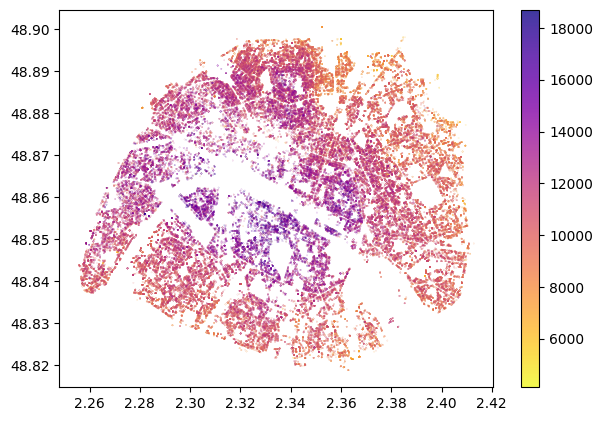

In [30]:
max_prix = np.quantile(df.Prix_m2, 0.99)
min_prix = np.quantile(df.Prix_m2, 0.01)

df_to_visualise = df[(df.Prix_m2 < max_prix)
                        & (df.Prix_m2 > min_prix)
                        & (df.code_type_local == 2)]
    
df_sorted = df_to_visualise.sort_values(by='Prix_m2')
x = df_sorted['longitude']
y = df_sorted['latitude']
c = df_sorted['Prix_m2'] 

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
plt.colorbar()
plt.show()

In [14]:
visualise(df, 200, 1000, 'Paris', 2, 0.99, 0.1)

KeyError: 'bv2012_name'

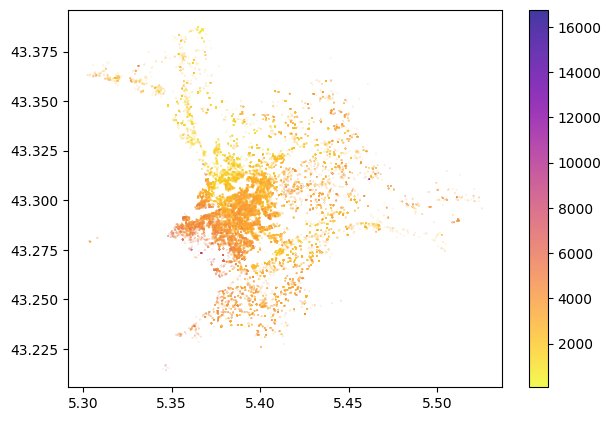

In [23]:
visualise(df, 200, 1000, 'Marseille - Aix-en-Provence', 2, 0.99, 0)

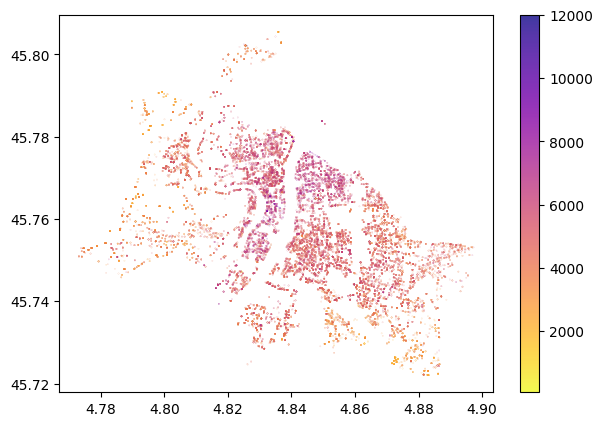

In [24]:
visualise(df, 200, 1000, 'Lyon', 2, 1, 0)

## <center> Statistiques Descriptives

In [38]:
df.groupby(['bv2012_name', 'code_type_local']).agg({'id_mutation' : 'count'}).reset_index()

,bv2012_name,code_type_local,id_mutation
0,['Lyon'],1.0,682
1,['Lyon'],2.0,33914
2,['Marseille - Aix-en-Provence'],1.0,5738
3,['Marseille - Aix-en-Provence'],2.0,45149
4,['Paris'],1.0,493
5,['Paris'],2.0,144048
6,['Toulouse'],1.0,4684
7,['Toulouse'],2.0,32683


## <center> K plus proches voisins sur la latitude/longitude

#### Pour PARIS

In [31]:
df['bv2012_name'] = "['Paris']"

In [37]:
    # Définition du dataset
# Sélectionner Paris sur les appartements (2) + sélection sur les quantiles
df_model = filtre_data_pour_model(df, 'Paris', 2, 0.1, 0.99)

    # Définition des var explicatives
features = ['latitude', 'longitude', 'nombre_pieces_principales', 'Nombre_dependance',
           'IPL', 'IPL_{Q-1}', 'N_proprietaire', 'N_vacant', 'N_apparts', 'n_metros_iris', 'taux_accroissement']
    # Def de l'output
label = 'Prix_m2'

In [36]:
df.columns

Index(['Unnamed: 0', 'id_mutation', 'date_mutation', 'code_type_local',
       'code_commune', 'surface_terrain', 'surface_reelle_bati',
       'nombre_pieces_principales', 'nature_culture', 'valeur_fonciere',
       'latitude', 'longitude', 'nombre_lots', 'numero_disposition',
       'code_departement', 'Nombre_house', 'Nombre_dependance', 'geometry',
       'iris_code', 'iris_name', 'Prix_m2', 'Year', 'Month',
       'prix_m2_moy_surf_habit', 'prix_m2_moy_terrain', 'Vente_par_iris',
       'num_trimestre', 'quarter', 'IPL', 'IPL_{Q-1}', 'N_logements',
       'N_res_ppale', 'N_res_second', 'N_vacant', 'N_maisons', 'N_apparts',
       'N_proprietaire', 'N_locataire', 'Arrondissement', 'n_metros_iris',
       'dist_metro', 'trimestre', 'prix_m2_moy_IRIS_trimestri_surf_habit',
       'taux_accroissement', 'bv2012_name'],
      dtype='object')

In [38]:
# Split des données en TRAIN et TEST
X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)

In [39]:
X_train_knn = X_train[['latitude', 'longitude']]
X_test_knn = X_test[['latitude', 'longitude']]

La tableau nous indique de prendre 27 voisins.

In [40]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('Knn', KNeighborsRegressor(weights='distance'))])
parameters = {'Knn__n_neighbors': range(1,21,2)} # defining parameter space
knn_pipe = GridSearchCV(pipe, parameters, cv=5)
knn_pipe.fit(X_train_knn, y_train)

print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test_knn, y_test)))

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.07280222778216668
Classification accuracy on test is: 0.18243667430356703


In [43]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def MDAPE(Y_actual, Y_Predicted):
    mdape = np.median(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mdape

def compute_scores(model, X_test, y_test) :
    y_pred = model.predict(X_test)

    mape = MAPE(y_test, y_pred)
    mdape = MDAPE(y_test, y_pred)
    
    print("MAPE: ", mape)
    print("MDAPE: ", mdape)

In [44]:
compute_scores(knn_pipe, X_test[['latitude', 'longitude']], y_test)

MAPE:  12.495897681055776
MDAPE:  10.565439079887662


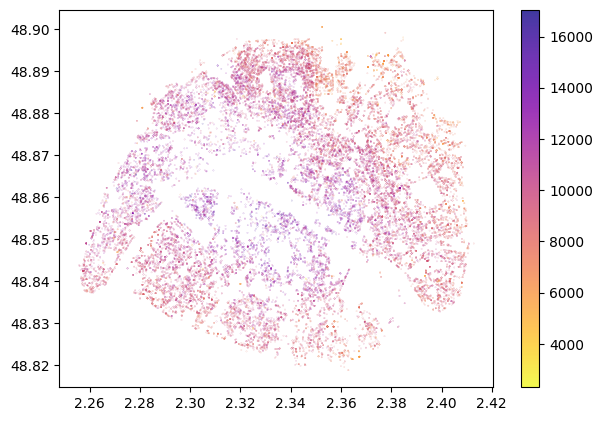

In [61]:
y_pred = knn_pipe.predict(X_test_knn)

x = X_test['longitude']
y = X_test['latitude']
c = np.exp(y_pred)

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
plt.colorbar()
plt.show()

In [62]:
y_pred

array([9.17895688, 9.39955736, 9.22938892, ..., 9.53034746, 8.96773788,
       9.32590427])

In [45]:
features2 = ['nombre_pieces_principales', 'Nombre_dependance',
           'IPL', 'IPL_{Q-1}', 'N_proprietaire', 'N_vacant', 'N_apparts', 'n_metros_iris']

X_train_rf = X_train[features2]
X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
X_test_rf = X_test[features2]
X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [50]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('RForest', RandomForestRegressor())])
parameters = {'RForest__max_depth': [5, 10, 15]} # defining parameter space
rforest_pipe = GridSearchCV(pipe, parameters, cv=5)
rforest_pipe.fit(X_train_rf, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('RForest', RandomForestRegressor())]),
             param_grid={'RForest__max_depth': [5, 10, 15]})

In [51]:
compute_scores(rforest_pipe, X_test_rf, y_test)

MAPE:  12.240725222150422
MDAPE:  9.812955708243049


In [47]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('GBoost', GradientBoostingRegressor())])
parameters = {'GBoost__n_estimators': [50, 75, 100, 150]} # defining parameter space
gboost_pipe = GridSearchCV(pipe, parameters, cv=5)
gboost_pipe.fit(X_train_rf, y_train)

compute_scores(gboost_pipe, X_test_rf, y_test)

MAPE:  12.203426050228659
MDAPE:  9.802461052365775


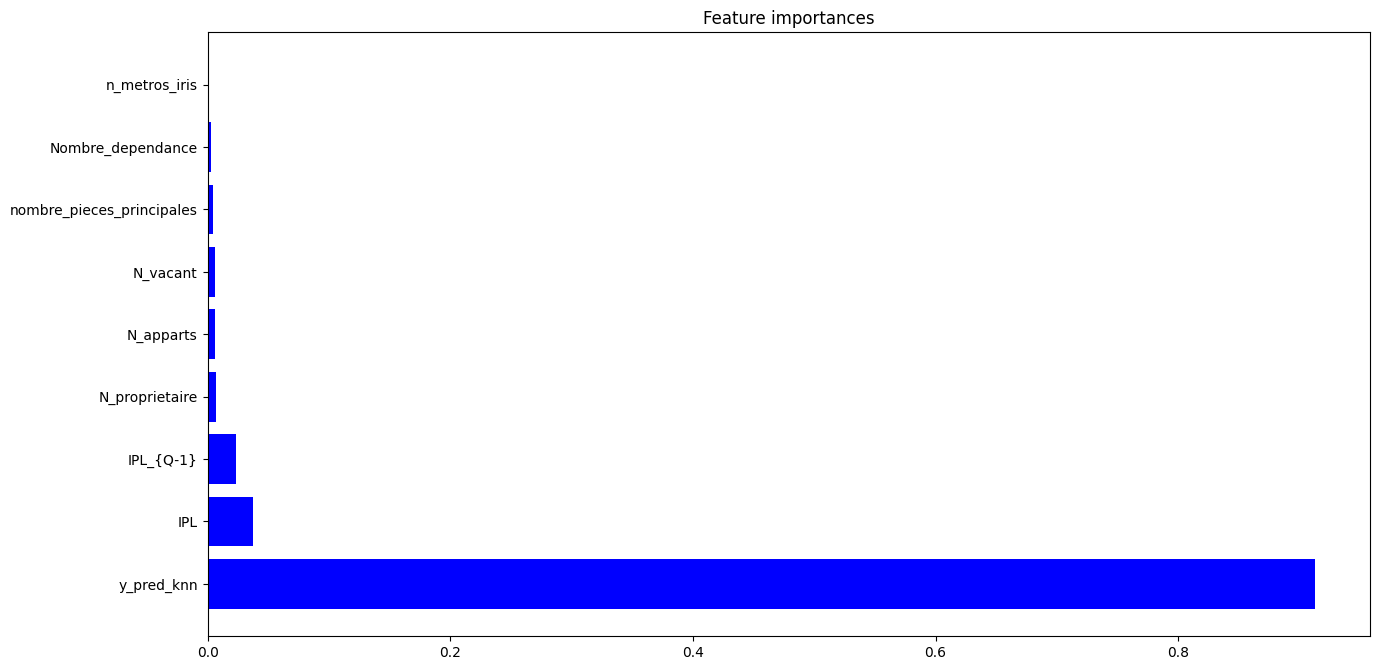

In [49]:
model_rf = RandomForestRegressor(max_depth=10)
model_rf.fit(X_train_rf, y_train)

#Prediciton 
y_pred_rf = model_rf.predict(X_test_rf)

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train_rf.columns
# plot
nb_features = X_train_rf.shape[1]
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.barh(
    range(nb_features),
    importances[indices],
    color='b')
plt.yticks(range(nb_features), columns[indices], rotation='horizontal', size=10)
plt.show()

#### Pour les autres villes : 

In [78]:
def run_model_knn(data, ville, type_local, q_low, q_high,
                  features, label,
                 scaler, model, nb_voisins, nb_cv, graph_on_test = False) : 
    
    df_model = filtre_data_pour_model(data, ville, type_local, q_low, q_high)
    
    features = features
    label = label
    
    X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)
    
    pipe = Pipeline([('scaler', scaler), ('Knn', model(weights='distance'))])
    parameters = {'Knn__n_neighbors': nb_voisins} # defining parameter space
    knn_pipe = GridSearchCV(pipe, parameters, cv=nb_cv)
    knn_pipe.fit(X_train, y_train)
    
    # Afficher les scores
    print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
    print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
    print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test, y_test)))

    compute_scores(knn_pipe, X_test, y_test)
    
    if graph_on_test : 
        y_pred = knn_pipe.predict(X_test)

        x = X_test['longitude']
        y = X_test['latitude']
        c = np.exp(y_pred)

        plt.rcParams['figure.figsize'] = [7, 5]
        plt.rcParams['figure.dpi'] = 100 

        plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
        plt.colorbar()
        plt.show()

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.2115394662595234
Classification accuracy on test is: -0.11585218164222666
MAPE:  23.11032074814159
MDAPE:  18.028305950236035


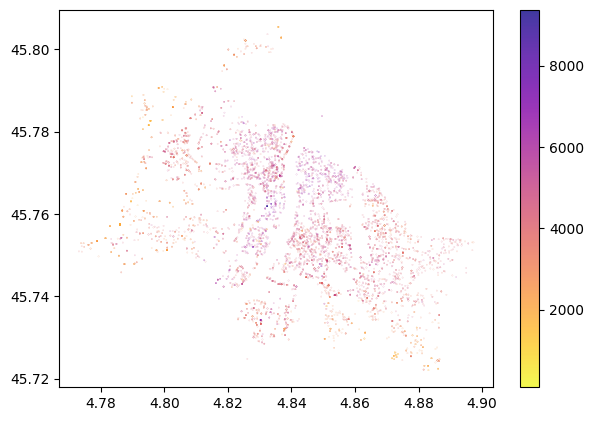

In [79]:
run_model_knn(df, 'Lyon', 2, 0, 1,
              ['latitude', 'longitude'], 'Prix_m2_log',
                 StandardScaler(), KNeighborsRegressor, range(1,21,2), 5, True)

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.6330709688258637
Classification accuracy on test is: 0.582998721206784
MAPE:  20.224616680597578
MDAPE:  16.773739972432605


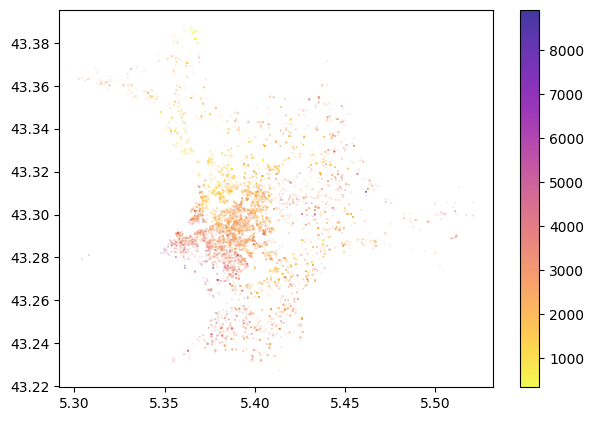

In [80]:
run_model_knn(df, 'Marseille - Aix-en-Provence', 2, 0, 1,
              ['latitude', 'longitude'], 'Prix_m2_log',
                 StandardScaler(), KNeighborsRegressor, range(1,21,2), 5, True)
mape = MAPE(np.exp(y_test), np.exp(y_pred))
mdape = MDAPE(np.exp(y_test), np.exp(y_pred))
    
print("MAPE: ", mape)
print("MDAPE: ", mdape)

In [2]:
def run_model_knn_maison(data, ville, type_local, q_low, q_high,
                  features1, features2, label,
                 scaler, model, nb_voisins, nb_cv, graph_on_test = False) : 
    
    df_model = filtre_data_pour_model(data, ville, type_local, q_low, q_high)
    
    features = features1 + features2
    label = label
    
    X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)
    
        # --------------------  Etape 1 : Modèle KNN ---------------------------------
    # Créer les bases pour le modèle KNN (avec les features1)
    X_train_knn = X_train[features1]
    X_test_knn = X_test[features1]
    
    # Entraîner le modèle
    pipe = Pipeline([('scaler', scaler), ('Knn', model(weights='distance'))])
    parameters = {'Knn__n_neighbors': nb_voisins} # defining parameter space
    knn_pipe = GridSearchCV(pipe, parameters, cv=nb_cv)
    knn_pipe.fit(X_train_knn, y_train)
    
    # Prédictions sur l'éch de test et de train
    y_pred_test_knn = knn_pipe.predict(X_test_knn)
    y_pred_train_knn = knn_pipe.predict(X_train_knn)

    # Calcul des scores de la première étape
    mape_knn = MAPE(np.exp(y_test), np.exp(y_pred_test_knn))
    mdape_knn = MDAPE(np.exp(y_test), np.exp(y_pred_test_knn))
    
    print("MAPE (Etape 1 : Knn): ", mape_knn)
    print("MDAPE (Etape 1 : Knn): ", mdape_knn)
    
        # --------------------  Etape 2 : Modèle RandomForest ---------------------------------
    # Créer les bases pour le second modèle (avec les features2)
    X_train_rf = X_train[features2]
    X_test_rf = X_test[features2]
    
    # Ajouter les prédictions du modèle KNN
    X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
    X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)
    
    # Entraînement du modèle
    pipe2 = Pipeline([('scaler', StandardScaler()), ('RForest', RandomForestRegressor())])
    parameters = {'RForest__max_depth': [3, 4, 5, 6, 7, 8, 9]} # defining parameter space
    rforest_pipe = GridSearchCV(pipe2, parameters, cv=5)
    rforest_pipe.fit(X_train_rf, y_train)
    
    print("Scores de la seconde étape : ")
    print('Returned hyperparameter: {}'.format(rforest_pipe.best_params_))
    print('Best classification accuracy in train is: {}'.format(rforest_pipe.best_score_))
    print('Classification accuracy on test is: {}'.format(rforest_pipe.score(X_test_rf, y_test)))

    #Predition 
    y_pred_rf = rforest_pipe.predict(X_test_rf)
    
    # Calcul des scores de la seconde étape
    
    print("MAPE (Etape 2 : RForest): ", MAPE(np.exp(y_test), np.exp(y_pred_rf)))
    print("MDAPE (Etape 2 : RForest): ", MDAPE(np.exp(y_test), np.exp(y_pred_rf)))

In [3]:
run_model_knn_maison(df, 'Marseille - Aix-en-Provence', 1, 0, 1,
                     ['latitude', 'longitude'],
                     ['surface_reelle_bati_log', 'nombre_pieces_principales', 'nombre_lots'],
                     'valeur_fonciere_log',
                 MinMaxScaler(), KNeighborsRegressor, range(1,21,2), 5, True)

NameError: name 'df' is not defined

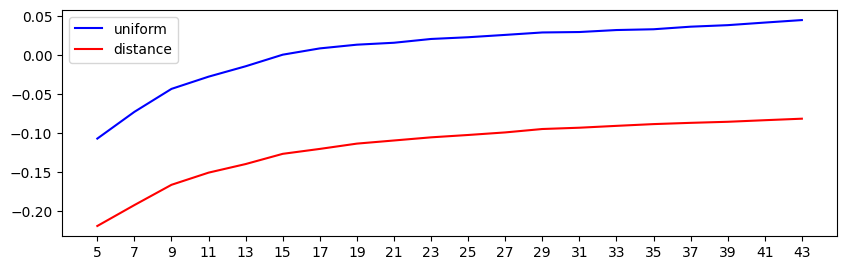

In [151]:
uniform  = []
distance = []
r = range (5,45,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [176]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.01963429229747025

In [50]:
#pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})